# Pre-Pruning in Decision Trees

This collab notebook contains the necessary steps to perform pre-pruning in Decision Trees. I hope you may find it insightful!

Pruning techniques are primarily used to avoid overfitting.

Pre pruning is nothing but stopping the growth of decision tree on an early stage. For that we can limit the growth of trees by setting constraints. We can limit parameters like max_depth , min_samples etc.

An effective way to conduct the same is to grid search the parameters and choose the optimum values that gives better performance on test data.

Some parameters used for pre-pruning:
1. max_depth: maximum depth of decision tree
2. min_sample_split: The minimum number of samples required to split an internal node:
3. min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

References -
1. https://www.kaggle.com/code/arunmohan003/pruning-decision-trees-tutorial
2. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


### Diabetes classification dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import load_breast_cancer

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [ ]:
!ls /kaggle/input/pima-indians-diabetes-database

diabetes.csv


In [ ]:
df = pd.read_csv(path + "/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
x,y = df.iloc[:, :-1], df.iloc[:, -1]

In [ ]:
st = StandardScaler()
x = st.fit_transform(x)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 47)

model = DecisionTreeClassifier(random_state = 42)
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
acc = accuracy_score(ytest, ypred)
f1s = f1_score(ytest, ypred)
acc, f1s

(0.7402597402597403, 0.5652173913043478)

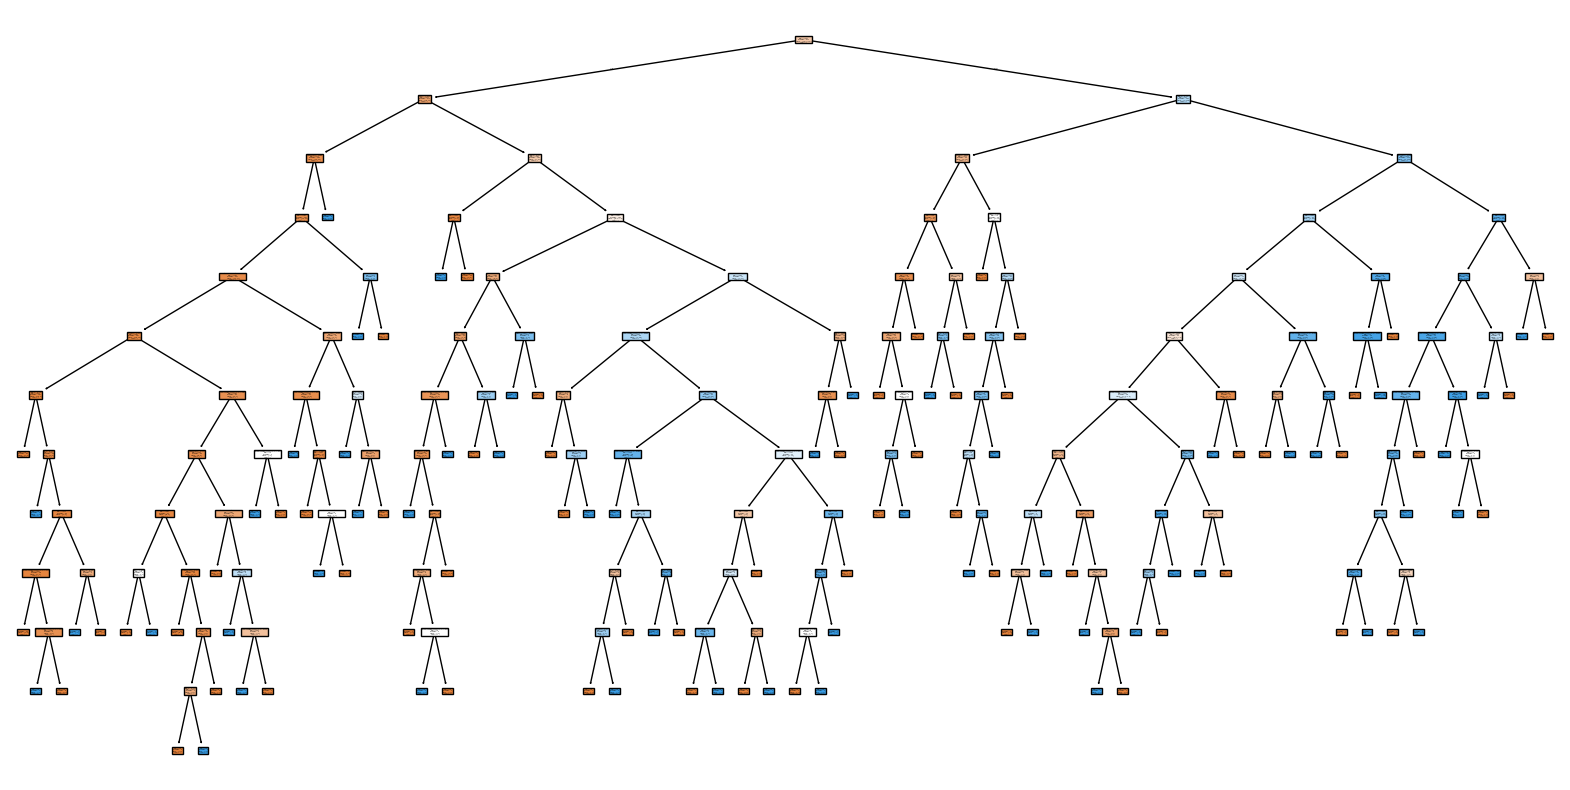

In [ ]:
plt.figure(figsize = (20,10))
features = df.iloc[:, :-1].columns.to_list()
classes = [str(i) for i in y.unique()]
tree.plot_tree(model, feature_names=features, class_names=classes, filled = True)
plt.show()

In [ ]:
#Cross validation
params = {
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10,12],
    'max_features': ['sqrt','log2']
}

In [ ]:
model = DecisionTreeClassifier(random_state = 5)
gcv = GridSearchCV(estimator = model, param_grid= params, cv = 5)
gcv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10, 12]})

In [ ]:
gcv.best_params_

{'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [ ]:
model = gcv.best_estimator_
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
acc = accuracy_score(ytest, ypred)
f1s = f1_score(ytest, ypred)
acc, f1s

(0.7402597402597403, 0.5652173913043478)

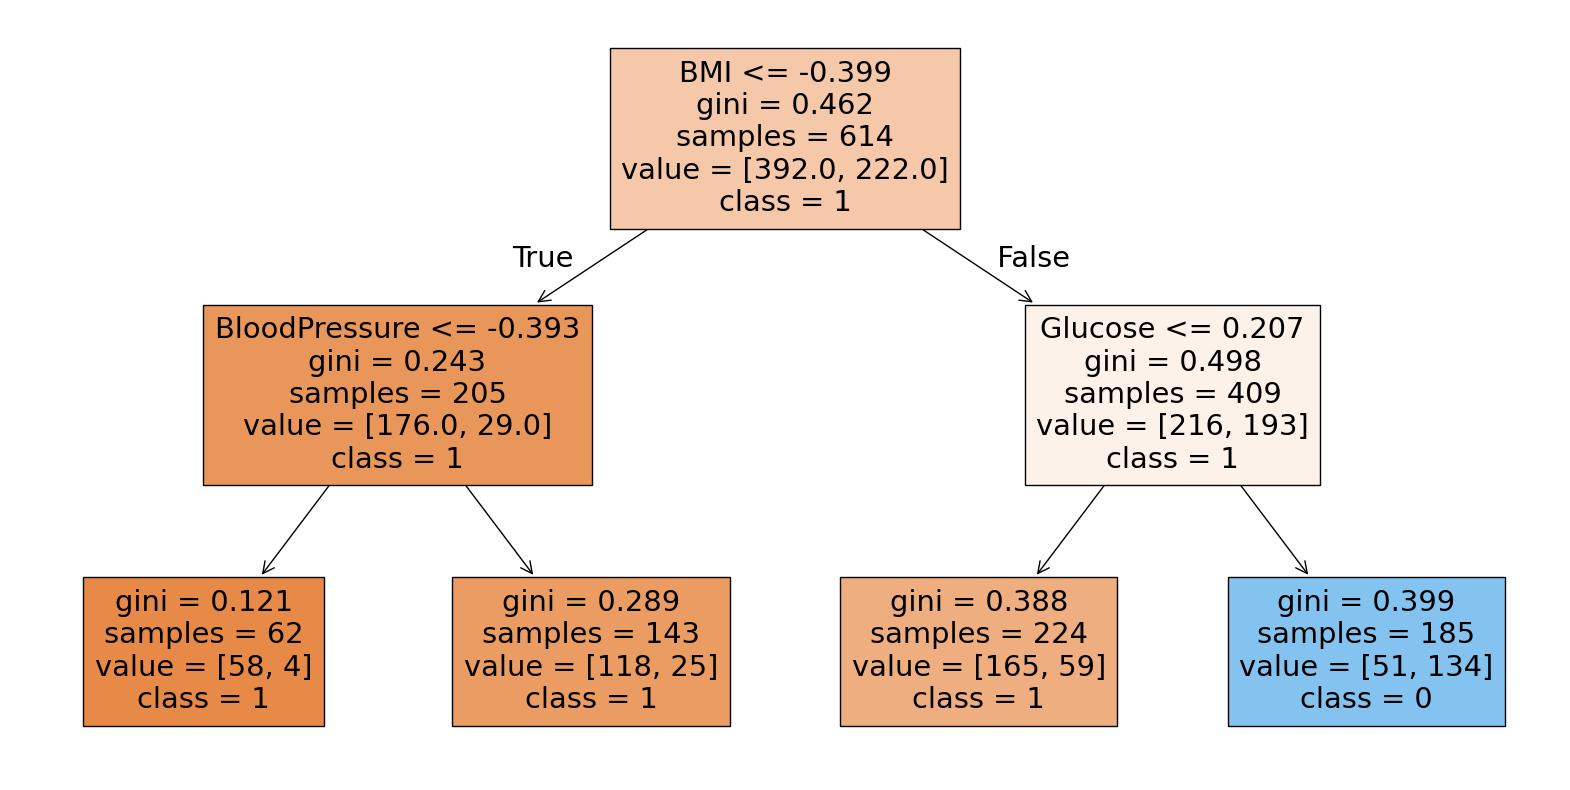

In [ ]:
plt.figure(figsize = (20,10))
features = df.iloc[:, :-1].columns.to_list()
classes = [str(i) for i in y.unique()]
tree.plot_tree(model, feature_names=features, class_names=classes, filled = True)
plt.show()

### Breast cancer dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
x,y = df.iloc[:, :-1], df.iloc[:, -1]

In [ ]:
st = StandardScaler()
x = st.fit_transform(x)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 47)

model2 = DecisionTreeClassifier(random_state = 42)
model2.fit(xtrain, ytrain)

ypred = model2.predict(xtest)
acc = accuracy_score(ytest, ypred)
f1s = f1_score(ytest, ypred)
acc, f1s

(0.9122807017543859, 0.927536231884058)

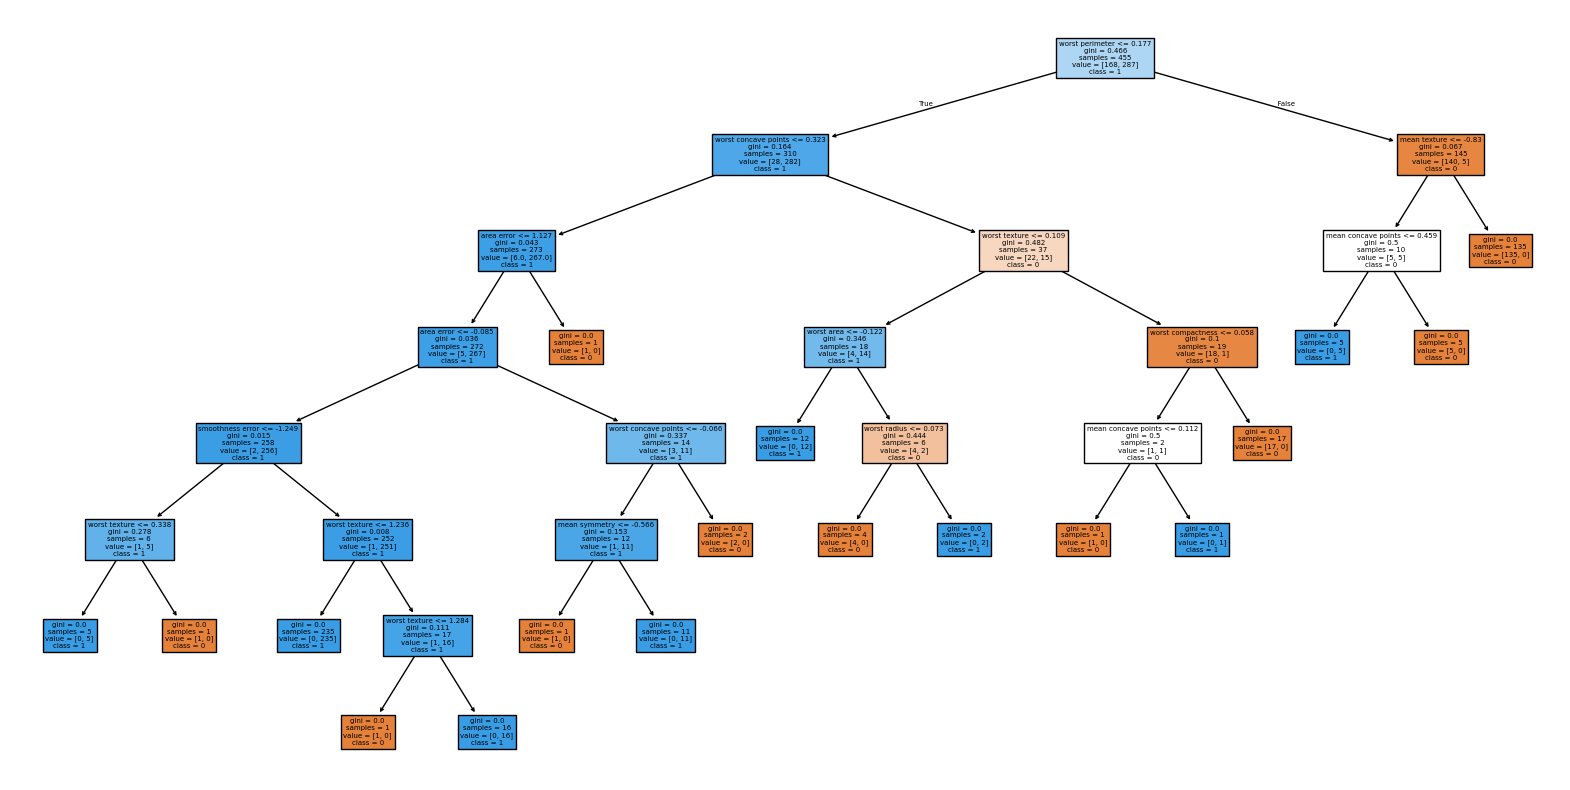

In [ ]:
plt.figure(figsize = (20,10))
features = df.iloc[:, :-1].columns.to_list()
classes = [str(i) for i in y.unique()]
tree.plot_tree(model2, feature_names=features, class_names=classes, filled = True)
plt.show()

In [ ]:
params = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [2,3,4,5,6,7],
    'min_samples_leaf': [1,2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10,12],
    'max_features': ['sqrt','log2']
}

In [ ]:
model = DecisionTreeClassifier(random_state = 49)
gcv = GridSearchCV(estimator = model, param_grid= params, cv = 5)
gcv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=49),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10, 12]})

In [ ]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 8}

In [ ]:
gcv.score(xtest, ytest)

0.9473684210526315

In [ ]:
model = gcv.best_estimator_
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
acc = accuracy_score(ytest, ypred)
f1s = f1_score(ytest, ypred)
acc, f1s

(0.9473684210526315, 0.9565217391304348)

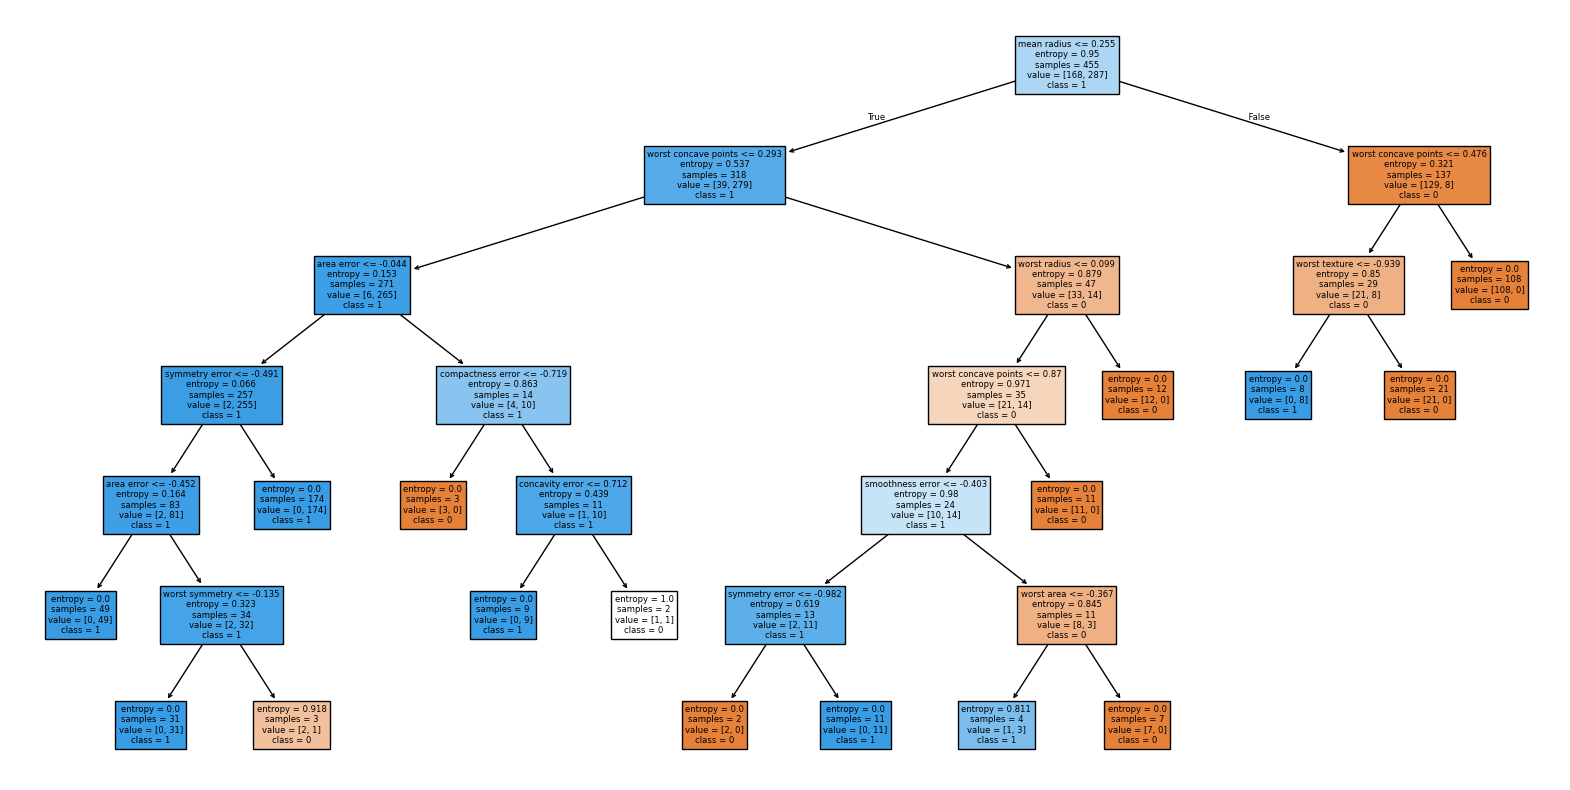

In [ ]:
plt.figure(figsize = (20,10))
features = df.iloc[:, :-1].columns.to_list()
classes = [str(i) for i in y.unique()]
tree.plot_tree(model, feature_names=features, class_names=classes, filled = True)
plt.show()

### Abalone Dataset



In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, RepeatedKFold, StratifiedKFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error
from sklearn.datasets import load_breast_cancer

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
x = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [ ]:
abalone.variables

,name,role,type,demographic,description,units,missing_values
0,Sex,Feature,Categorical,None,"M, F, and I (infant)",None,no
1,Length,Feature,Continuous,None,Longest shell measurement,mm,no
2,Diameter,Feature,Continuous,None,perpendicular to length,mm,no
3,Height,Feature,Continuous,None,with meat in shell,mm,no
4,Whole_weight,Feature,Continuous,None,whole abalone,grams,no
5,Shucked_weight,Feature,Continuous,None,weight of meat,grams,no
6,Viscera_weight,Feature,Continuous,None,gut weight (after bleeding),grams,no
7,Shell_weight,Feature,Continuous,None,after being dried,grams,no
8,Rings,Target,Integer,None,+1.5 gives the age in years,None,no


In [ ]:
#Since our target for classication is the Sex column, we will remove it from the 'x' dataset and add it to 'y'
x = pd.concat([x,y], axis = 1)
y = x.pop('Sex')

In [ ]:
y = y.map({'M':0,'F':1,'I':2})
y

,Sex
0,0
1,0
2,1
3,0
4,2
...,...
4172,1
4173,0
4174,0
4175,1


In [ ]:
x

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
st = StandardScaler()
x = st.fit_transform(x)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 47)

model = DecisionTreeClassifier(random_state = 1)
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
acc = accuracy_score(ytest, ypred)
f1s = f1_score(ytest, ypred, average ='weighted')
acc, f1s

(0.5059808612440191, 0.5091258013629368)

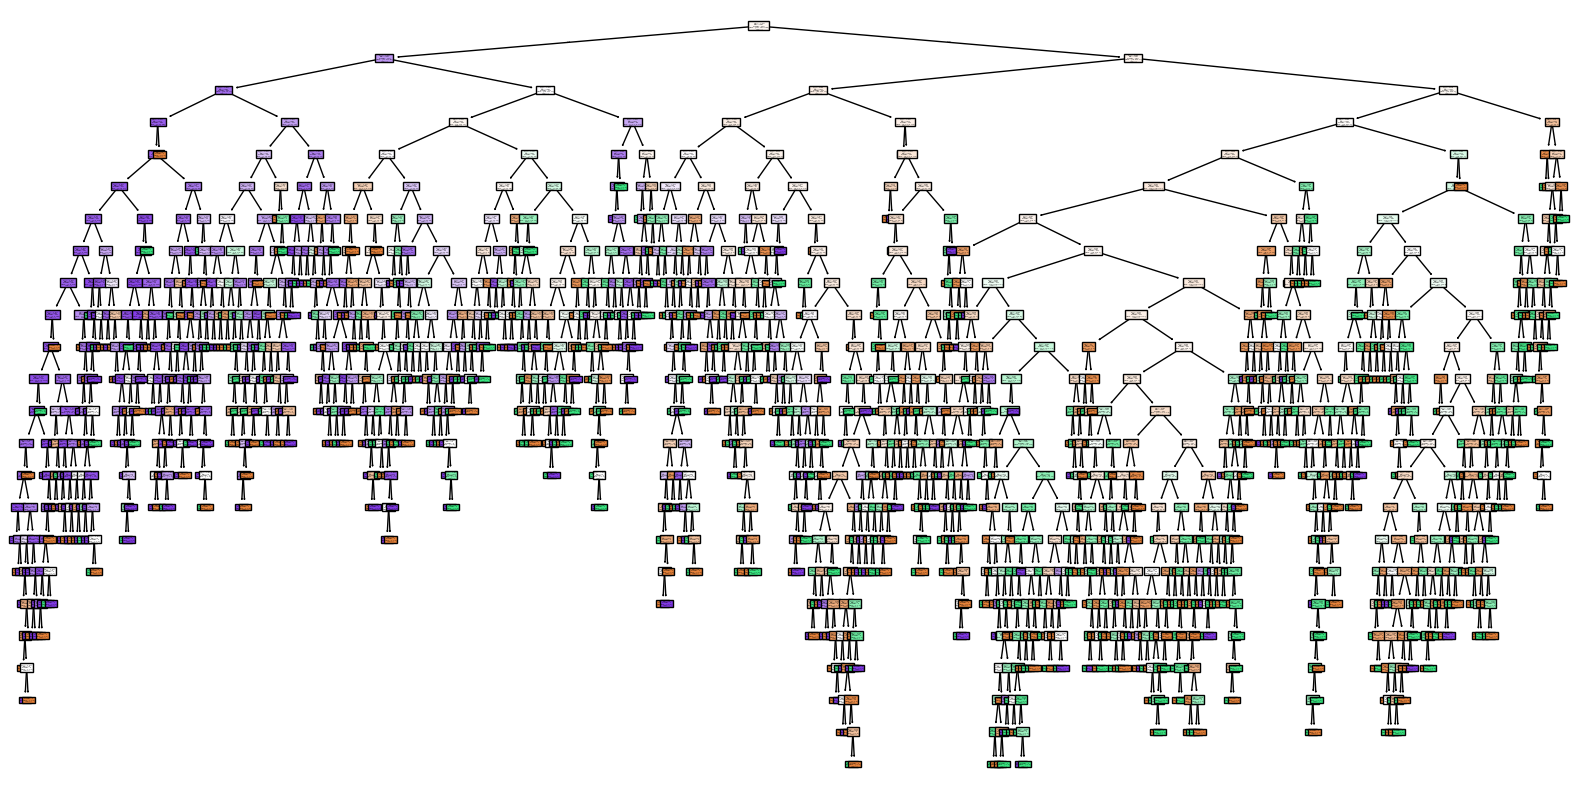

In [ ]:
plt.figure(figsize = (20,10))
classes = [str(i) for i in y.unique()]
tree.plot_tree(model, class_names=classes, filled = True)
plt.show()

In [ ]:
params = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [2,4,6,8,10,12],
    'min_samples_leaf': [1,2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10,12],
    'max_features': ['sqrt','log2']
}

In [ ]:
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=2652124)
skf = StratifiedKFold(n_splits = 5)

In [ ]:
model = DecisionTreeClassifier(random_state = 7) #01
#gcv = GridSearchCV(estimator = model, param_grid= params, cv = 5)
#gcv = GridSearchCV(estimator = model, param_grid= params, cv = rkf)
gcv = GridSearchCV(estimator = model, param_grid= params, cv = skf)
gcv.fit(xtrain, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10, 12]})

In [ ]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [ ]:
model = gcv.best_estimator_
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
acc = accuracy_score(ytest, ypred)
f1s = f1_score(ytest, ypred, average ='weighted')
acc, f1s

(0.569377990430622, 0.5600167109515333)

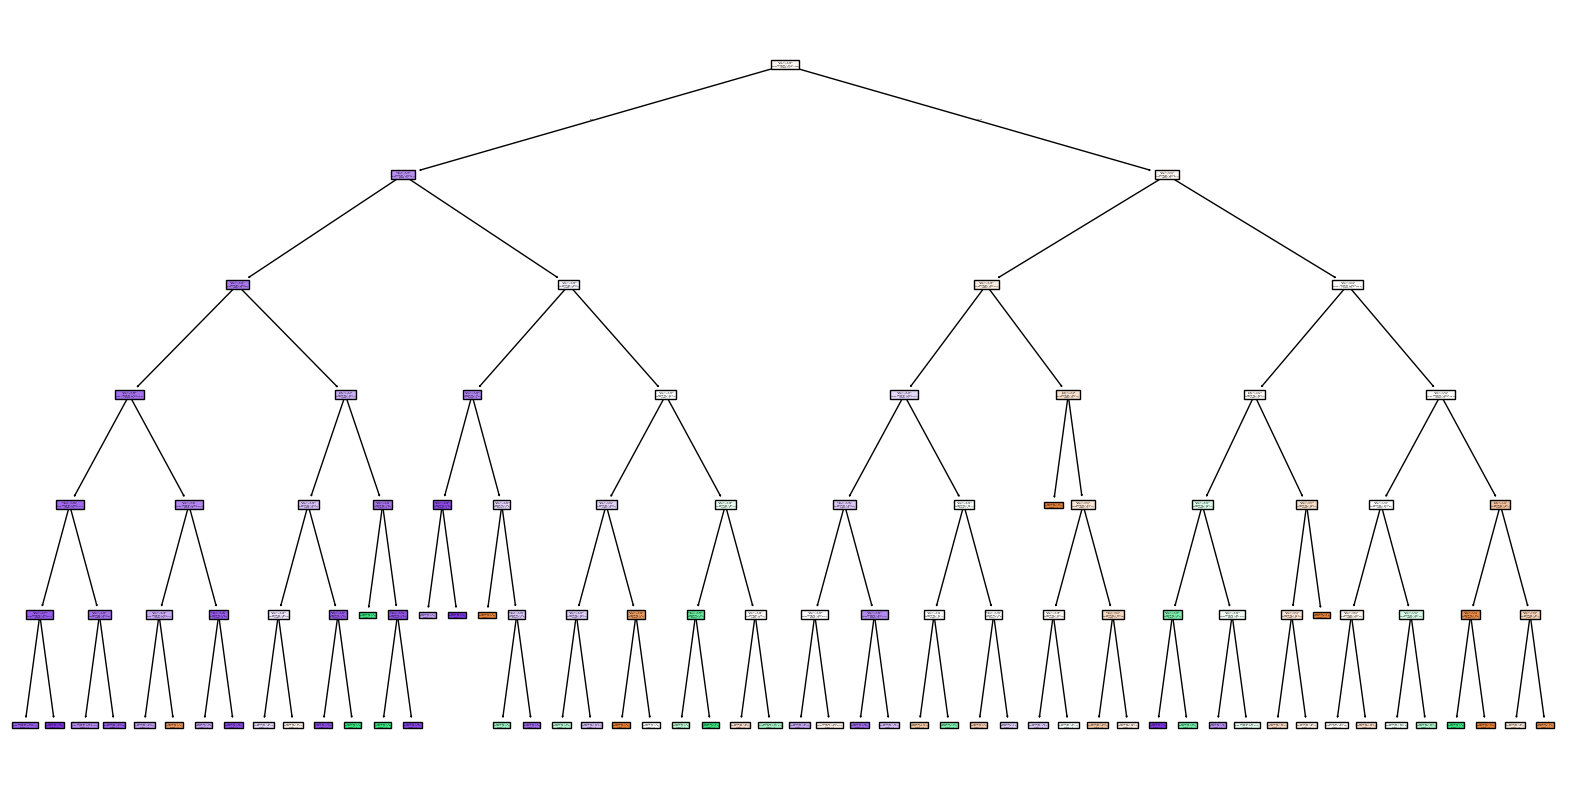

In [ ]:
plt.figure(figsize = (20,10))
classes = [str(i) for i in y.unique()]
tree.plot_tree(model, class_names=classes, filled = True)
plt.show()

### Titanic Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Preprocess the data
#data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()
data = data[['Pclass', 'Sex', 'Age','SibSp','Parch', 'Fare','Embarked','Survived']].dropna()
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex'
data['Embarked'] = data['Embarked'].map({'S':3, 'C':2, 'Q':1})

#X = data[['Pclass', 'Sex', 'Age', 'Fare',]]
X = data[['Pclass', 'Sex', 'Age','SibSp','Parch', 'Fare','Embarked']]
y = data['Survived']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
data.head()

In [ ]:
data.Embarked.unique()

array([3, 2, 1])

Accuracy (Full Tree): 0.6962616822429907


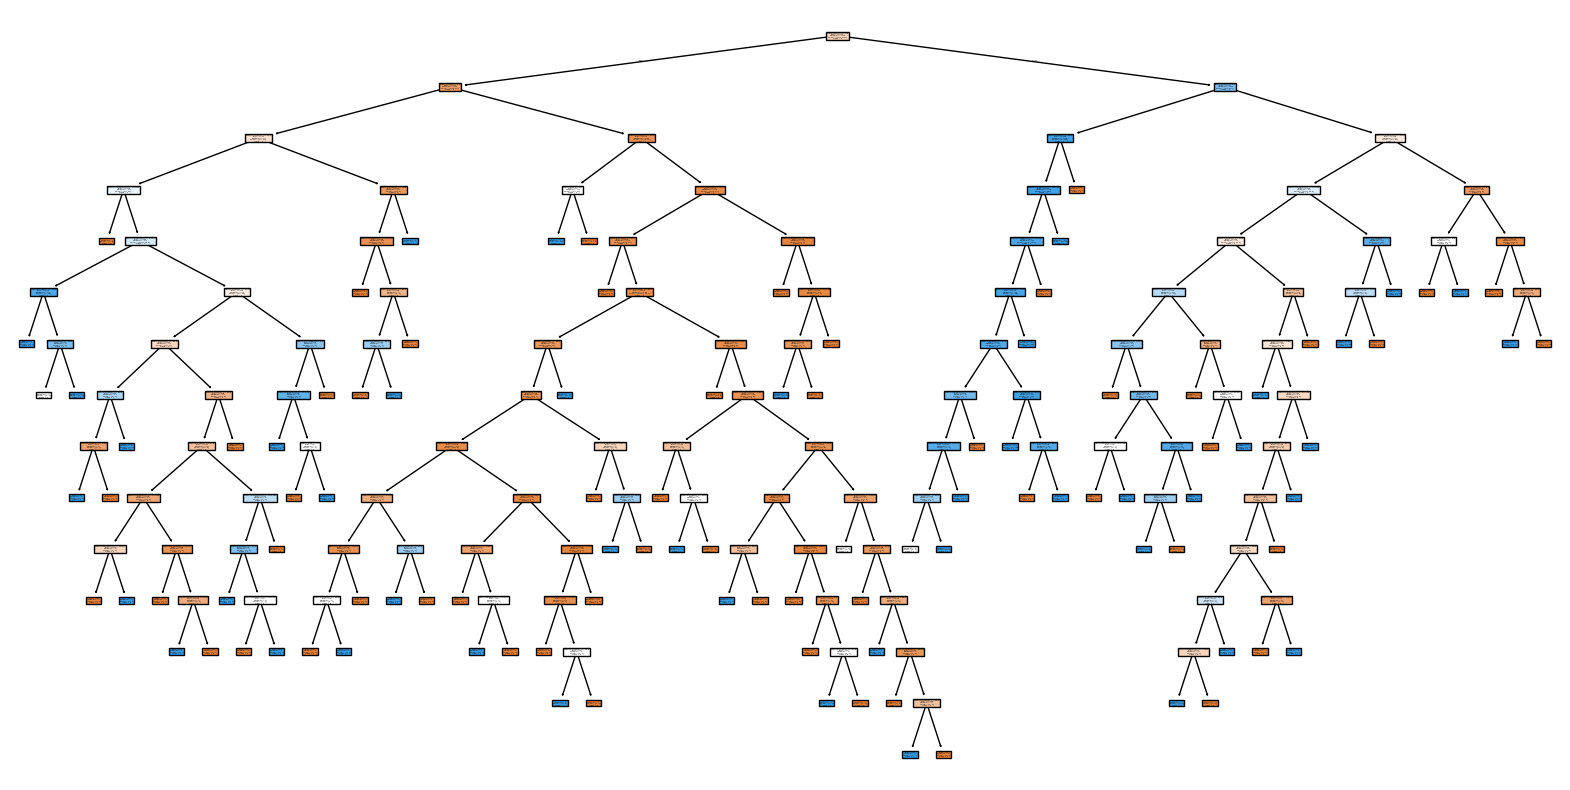

In [ ]:
# Train a decision tree without pruning
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
print("Accuracy (Full Tree):", accuracy_score(y_test, y_pred))

# Visualize the full tree
plt.figure(figsize = (20,10))
features = df.iloc[:, :-1].columns
classes = [str(i) for i in y.unique()]
tree.plot_tree(model, feature_names=features, class_names=classes, filled = True)
plt.show()

In [ ]:
params = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10,12],
    'max_features': ['sqrt','log2']
}

In [ ]:
model = DecisionTreeClassifier(random_state = 47)
gcv = GridSearchCV(estimator = model, param_grid= params, cv = 5)
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=47),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10, 12]})

In [ ]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 12}

In [ ]:
gcv.score(X_test, y_test)

0.7242990654205608

In [ ]:
model = gcv.best_estimator_
model.fit(X_train, y_train)

ypred = model.predict(X_test)
acc = accuracy_score(y_test, ypred)
f1s = f1_score(y_test, ypred, average ='weighted')
acc, f1s

(0.7242990654205608, 0.7207921861698745)

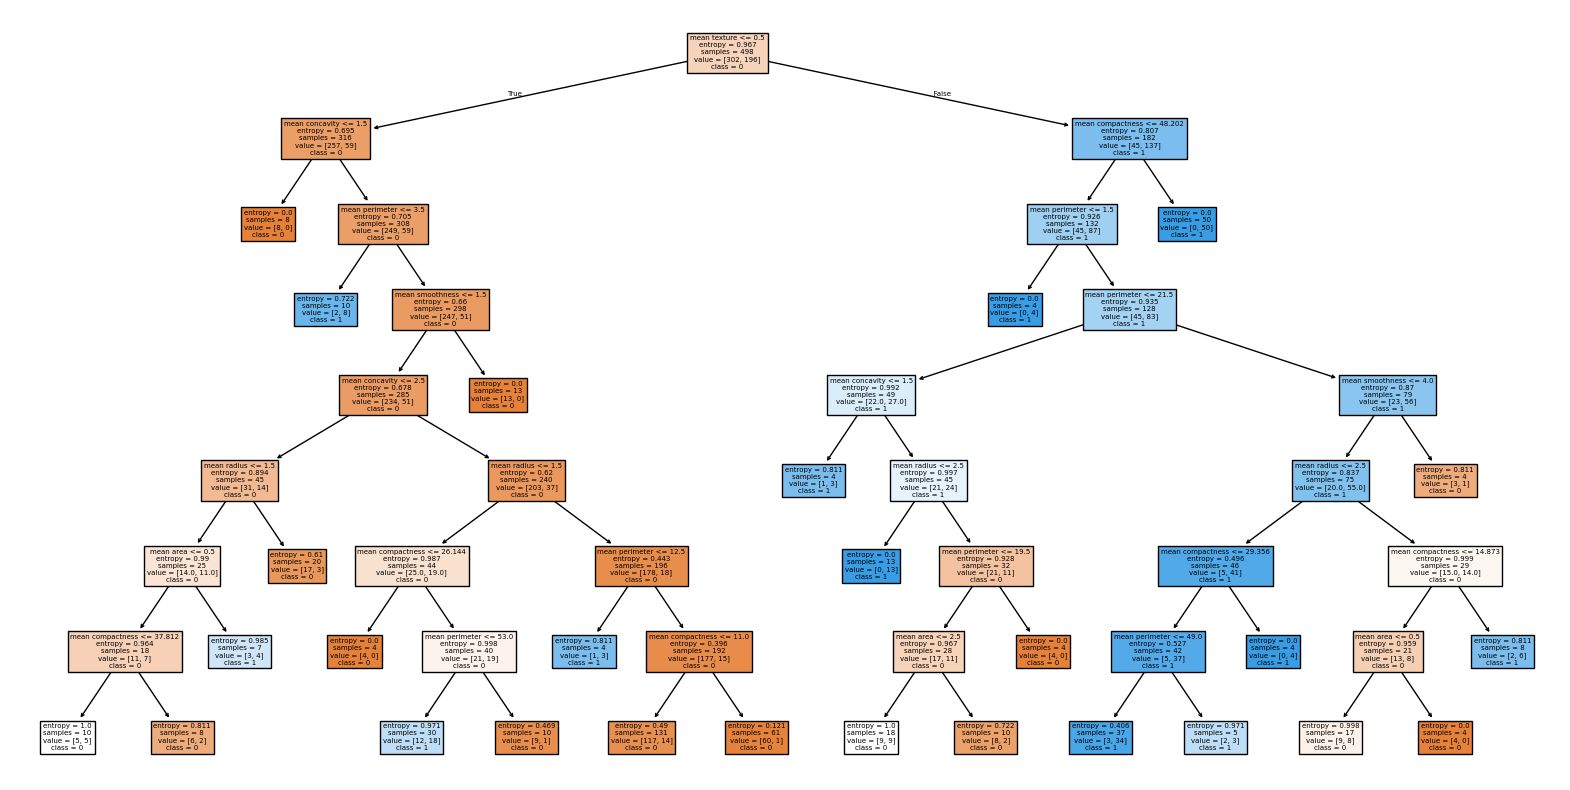

In [ ]:
# Visualize the full tree
plt.figure(figsize = (20,10))
features = df.iloc[:, :-1].columns
classes = [str(i) for i in y.unique()]
tree.plot_tree(model, feature_names=features, class_names=classes, filled = True)
plt.show()